# Week 5 Notebook - Multilayered Perceptrons

## Multilayered Perceptrons for Regression

In [1]:
%matplotlib inline
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.collections import LineCollection
from mpl_toolkits.mplot3d.art3d import Line3DCollection
from sklearn.model_selection import train_test_split


np.random.seed = 47

# If you are NOT using google colab, you need to take this part out starting from here
#from google.colab import files

#uploaded=files.upload()
# till here

advertising = pd.read_csv('Advertising.csv',usecols=(1,2,3,4))

advertising.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [2]:
X = np.array(advertising['TV']).reshape(-1,1)
y = np.array(advertising['Sales'])

X_train, X_test, y_train, y_test =train_test_split(
    X, y, test_size=0.2, random_state=9)

stdscaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = stdscaler.transform(X_train)
X_test_scaled  = stdscaler.transform(X_test)

In [4]:
# Implement your code here               
from keras.models import Sequential
from keras.layers import Dense
from keras.regularizers import l2, l1
from keras.optimizers import SGD

# Stochastic Logistic Regression
model = Sequential()

# Model 
model.add(Dense(units=2, input_shape=[X_train_scaled.shape[1]], 
                activation='sigmoid'))
model.add(Dense(units=1, activation='linear')) # these are the layers we add to our model

# Slightly better model.
# model.add(Dense(units=4, input_shape=[X_train_scaled.shape[1]], 
#                 activation='relu'))
# model.add(Dense(units=2, activation='sigmoid'))
# model.add(Dense(units=1, activation='linear'))


# Compile model
sgd = SGD(learning_rate=0.001)
model.compile(loss='mean_squared_error', optimizer=sgd)

In [5]:
# Fit the model
history = model.fit(X_train_scaled, y_train.reshape(-1,1), batch_size = 256,
          epochs = 100, verbose=0, validation_data=(X_test_scaled,y_test.reshape(-1,1)))

RMSE Loss after final iteration:  10.86845604453513


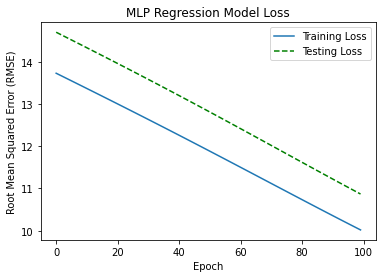

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(6,4))
# # summarize history for loss
plt.plot(np.sqrt(history.history['loss']))
plt.plot(np.sqrt(history.history['val_loss']), 'g--')
plt.title('MLP Regression Model Loss')
plt.ylabel('Root Mean Squared Error (RMSE)')
plt.xlabel('Epoch')
plt.legend(['Training Loss', 'Testing Loss'], loc='upper right')
print("RMSE Loss after final iteration: ", np.sqrt(history.history['val_loss'][-1]))
plt.show()

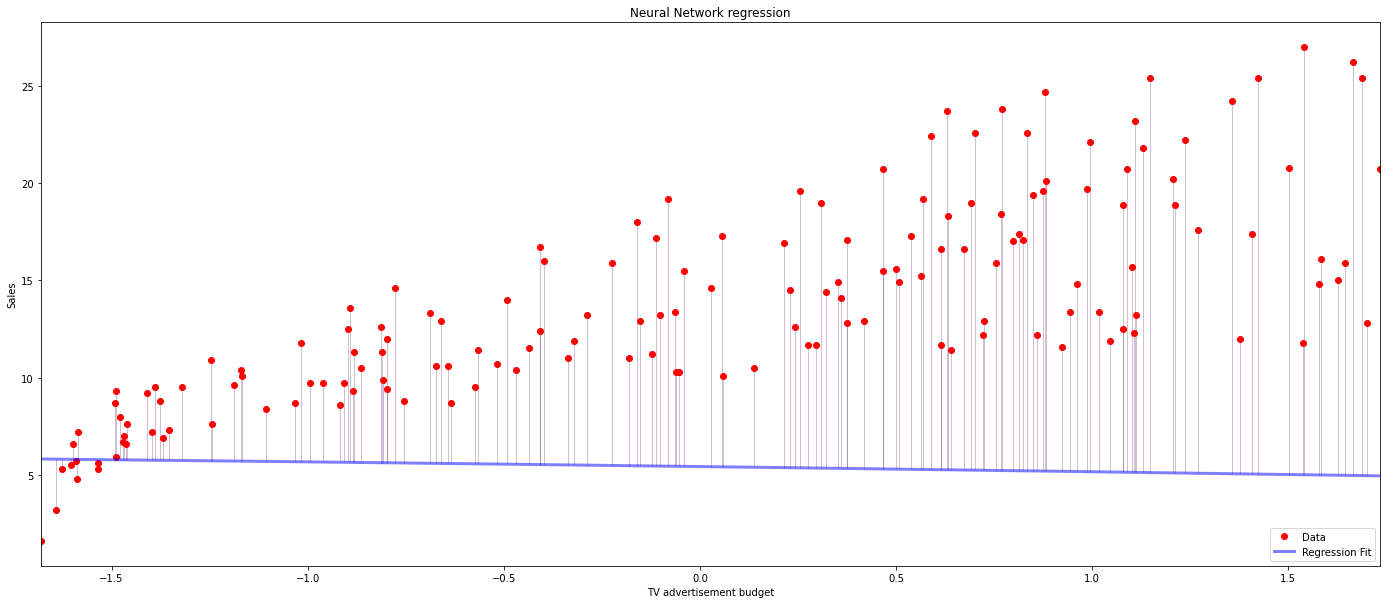

In [7]:
from matplotlib.collections import LineCollection

y_predicted = model.predict(X_train_scaled)
N = len(y_train)

segments = [[[X_train_scaled[i], y_train[i]], [X_train_scaled[i], y_predicted[i]]] for i in range(N)]
lc = LineCollection(segments, zorder=0)
lc.set_array(np.ones(len(y_train)))
lc.set_alpha(0.5)
lc.set_linewidths(0.5 * np.ones(len(y_train)))

fig = plt.figure(figsize=[24,10])
# plot the training data
plt.plot(X_train_scaled, y_train, 'r.', markersize=12)
# plot the prediction line
x_lin = np.linspace(X_train_scaled.min(),X_train_scaled.max(),1000).reshape(-1,1)
plt.plot(x_lin, model.predict(x_lin), color='blue',linewidth=3,alpha=0.5)
# plot the redisuals
plt.gca().add_collection(lc)

plt.xlim([X_train_scaled.min(),X_train_scaled.max()])
plt.xlabel('TV advertisement budget')
plt.ylabel('Sales')
plt.legend(('Data', 'Regression Fit'), loc='lower right')
plt.title('Neural Network regression')

# plot the regression line
plt.show()

In [28]:
#########################          Code for the Assignment          #########################
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.io import loadmat

data = loadmat('notMNIST_small.mat')
X_temp = data['images']/255
    
X = np.empty(shape=[X_temp.shape[2]] + [784], dtype='float32')
for i in range(X_temp.shape[2]):
    X[i,:] = X_temp[:,:,i].flatten()

y = pd.get_dummies(data['labels']).to_numpy()

In [29]:
X_train, X_test, y_train, y_test =train_test_split(
    X, y, test_size=0.2, random_state=50)

stdscaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = stdscaler.transform(X_train)
X_test_scaled  = stdscaler.transform(X_test)

In [33]:
from keras.models import Sequential
from keras.layers import Dense
from keras.regularizers import l2, l1
from keras.optimizers import SGD

# Stochastic Logistic Regression
model = Sequential()

# validation loss 
model.add(Dense(units=10, input_shape=[784], activation='sigmoid', kernel_regularizer=l2(0.4)))

# Compile model
sgd = SGD(learning_rate=0.1)
model.compile(loss='categorical_crossentropy', optimizer=sgd)


# Model creation
history = model.fit(X_train_scaled, y_train, batch_size = 256,
          epochs = 100, verbose=0, validation_data=(X_test_scaled,y_test))
model.add(Dense(units=4, activation='relu'))
model.add(Dense(units=3, activation='relu'))


# 0.9869

In [34]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 10)                7850      
_________________________________________________________________
dense_10 (Dense)             (None, 4)                 44        
_________________________________________________________________
dense_11 (Dense)             (None, 3)                 15        
Total params: 7,909
Trainable params: 7,909
Non-trainable params: 0
_________________________________________________________________


Loss after final iteration:  0.9869441390037537


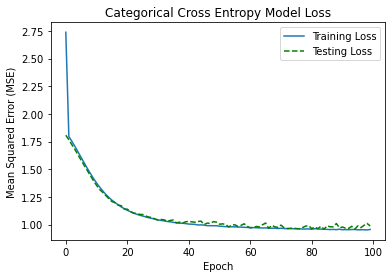

In [35]:
%matplotlib inline
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(6,4))
# # summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'], 'g--')
plt.title('Categorical Cross Entropy Model Loss')
plt.ylabel('Mean Squared Error (MSE)')
plt.xlabel('Epoch')
plt.legend(['Training Loss', 'Testing Loss'], loc='upper right')
print("Loss after final iteration: ", history.history['val_loss'][-1])
plt.show()

### KDD Cup 1999 Network Security Dataset

In this next example, we will look at the KDD Cup 1999 dataset. (10% subset)

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

from sklearn import preprocessing

from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.regularizers import l2,l1
from keras.optimizers import SGD
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

np.random.seed = 47

# If you are NOT using google colab, you need to take this part out starting from here
#from google.colab import files

#uploaded=files.upload()
# till here

data = pd.read_csv('kddcup.data_10_percent.csv',header=None)
dataCols = ['duration','protocol_type','service','flag','src_bytes','dst_bytes',
    'land','wrong_fragment','urgent','hot','num_failed_logins','logged_in','num_compromised',
    'root_shell','su_attempted','num_root','num_file_creations','num_shells',
    'num_access_files','num_outbound_cmds','is_host_login','is_guest_login',
    'count','srv_count','serror_rate','srv_serror_rate','rerror_rate','srv_rerror_rate',
    'same_srv_rate','diff_srv_rate','srv_diff_host_rate','dst_host_count','dst_host_srv_count',
    'dst_host_same_srv_rate','dst_host_diff_srv_rate','dst_host_same_src_port_rate',
    'dst_host_srv_diff_host_rate','dst_host_serror_rate','dst_host_srv_serror_rate',
    'dst_host_rerror_rate','dst_host_srv_rerror_rate','target']
data.columns = dataCols

print("Shape: ", data.shape)
print("Targets: ", data['target'].unique())
data = data.reindex(np.random.permutation(data.index)).reset_index(drop=True)

target = data['target'].copy()
data = data.drop('target', axis=1)

data.head()

Shape:  (494021, 42)
Targets:  ['normal.' 'buffer_overflow.' 'loadmodule.' 'perl.' 'neptune.' 'smurf.'
 'guess_passwd.' 'pod.' 'teardrop.' 'portsweep.' 'ipsweep.' 'land.'
 'ftp_write.' 'back.' 'imap.' 'satan.' 'phf.' 'nmap.' 'multihop.'
 'warezmaster.' 'warezclient.' 'spy.' 'rootkit.']


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,tcp,http,SF,331,1650,0,0,0,0,...,129,255,1.0,0.0,0.01,0.02,0.00,0.00,0.0,0.0
1,0,tcp,http,SF,312,614,0,0,0,0,...,255,255,1.0,0.0,0.00,0.00,0.01,0.01,0.0,0.0
2,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,255,255,1.0,0.0,1.00,0.00,0.00,0.00,0.0,0.0
3,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,255,255,1.0,0.0,1.00,0.00,0.00,0.00,0.0,0.0
4,0,icmp,ecr_i,SF,520,0,0,0,0,0,...,255,255,1.0,0.0,1.00,0.00,0.00,0.00,0.0,0.0


In [9]:
discreteCols = ['protocol_type','service','flag']
dataDummies = pd.get_dummies(data[discreteCols])
data = data.drop(discreteCols, axis=1)

data = dataDummies.join(data)
data.head()

,protocol_type_icmp,protocol_type_tcp,protocol_type_udp,service_IRC,service_X11,service_Z39_50,service_auth,service_bgp,service_courier,service_csnet_ns,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,1,0,0,0,0,0,0,0,0,...,129,255,1.0,0.0,0.01,0.02,0.00,0.00,0.0,0.0
1,0,1,0,0,0,0,0,0,0,0,...,255,255,1.0,0.0,0.00,0.00,0.01,0.01,0.0,0.0
2,1,0,0,0,0,0,0,0,0,0,...,255,255,1.0,0.0,1.00,0.00,0.00,0.00,0.0,0.0
3,1,0,0,0,0,0,0,0,0,0,...,255,255,1.0,0.0,1.00,0.00,0.00,0.00,0.0,0.0
4,1,0,0,0,0,0,0,0,0,0,...,255,255,1.0,0.0,1.00,0.00,0.00,0.00,0.0,0.0


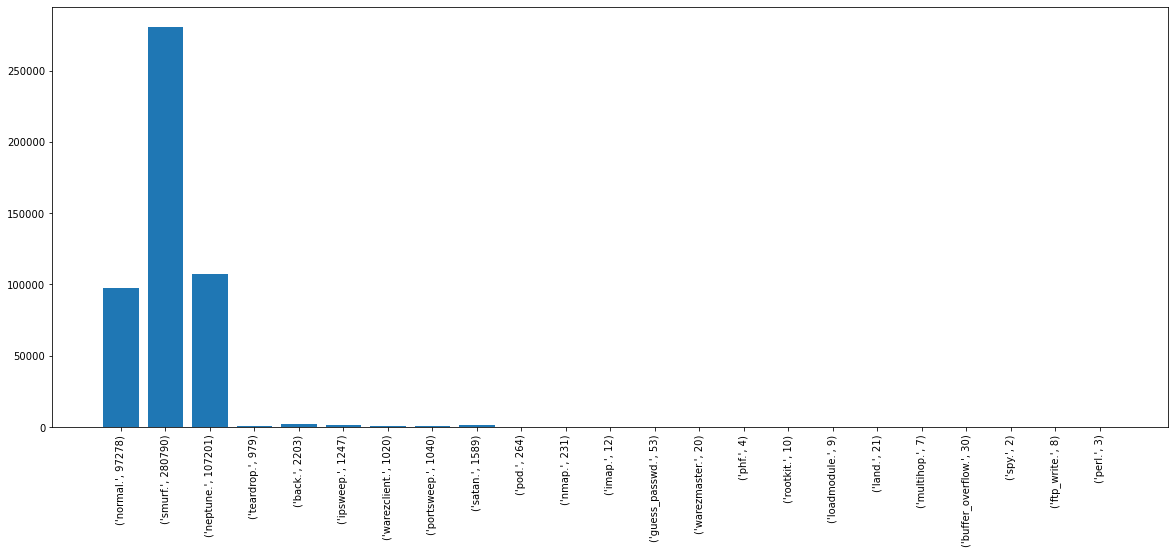

In [10]:
posteriorCount = {i:(target==i).sum() for i in target.unique()}
fig = plt.figure(figsize=(20,8))
plt.bar(range(len(posteriorCount)), posteriorCount.values(), align='center')
plt.xticks(range(len(posteriorCount)), zip(posteriorCount.keys(),posteriorCount.values()), rotation='vertical')
plt.subplots_adjust(bottom=0.15)
plt.show()

In [11]:
targetDummies = pd.get_dummies(target)
targetFull = targetDummies
targetFull.head()

,back.,buffer_overflow.,ftp_write.,guess_passwd.,imap.,ipsweep.,land.,loadmodule.,multihop.,neptune.,...,phf.,pod.,portsweep.,rootkit.,satan.,smurf.,spy.,teardrop.,warezclient.,warezmaster.
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [12]:
target[target != 'normal.'] = 1.0
target[target == 'normal.'] = 0.0
target.head()

0    0.0
1    0.0
2    1.0
3    1.0
4    1.0
Name: target, dtype: object

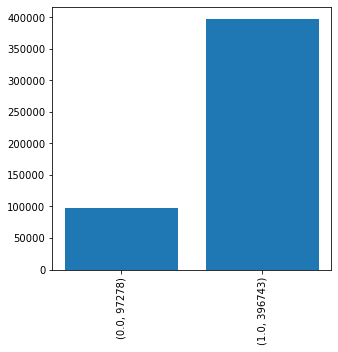

In [13]:
posteriorCount = {i:(target==i).sum() for i in target.unique()}
fig = plt.figure(figsize=(5,5))
plt.bar(range(len(posteriorCount)), posteriorCount.values(), align='center')
plt.xticks(range(len(posteriorCount)), zip(posteriorCount.keys(),posteriorCount.values()), rotation='vertical')
plt.subplots_adjust(bottom=0.15)
plt.show()

In [14]:
# split the data into training and testing sets
X_train, X_test, y_train, y_test =train_test_split(
    data, target, test_size=0.5, random_state=50)

X_train = X_train.reset_index(drop=True)
X_test  = X_test.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_test  = y_test.reset_index(drop=True)

print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

(247010, 118)
(247010,)
(247011, 118)
(247011,)


In [15]:
# standardize the data
# turn off the error message, we're not setting indivdual values.
pd.options.mode.chained_assignment = None

toStandardize = ['src_bytes', 'dst_bytes', 'count', 'srv_count',
                 'dst_host_count', 'dst_host_srv_count']
stdscaler = preprocessing.MinMaxScaler().fit(X_train[toStandardize])
X_train[toStandardize] = stdscaler.transform(X_train[toStandardize])
X_test[toStandardize]  = stdscaler.transform(X_test[toStandardize])

X_train.head()

,protocol_type_icmp,protocol_type_tcp,protocol_type_udp,service_IRC,service_X11,service_Z39_50,service_auth,service_bgp,service_courier,service_csnet_ns,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,1,0,0,0,0,0,0,0,0,0,...,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,1,0,0,0,0,0,0,0,0,0,...,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,1,0,0,0,0,0,0,0,0,0,...,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,1,0,0,0,0,0,0,0,0,0,...,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,1,0,0,0,0,0,0,0,0,0,...,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


### Logistic Regression Model on the KDD Cup 1999 dataset

In [16]:
from keras.models import Sequential
from keras.layers import Dense
from keras.regularizers import l2, l1
from keras.optimizers import SGD

# Stochastic Logistic Regression
model = Sequential()

# Model
model.add(Dense(units=1, input_shape=[X_train.shape[1]], 
                activation='sigmoid', kernel_regularizer=l2(0.001)))

# Compile model
sgd = SGD(learning_rate=0.1)
model.compile(loss='binary_crossentropy', optimizer=sgd)

In [17]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 1)                 119       
Total params: 119
Trainable params: 119
Non-trainable params: 0
_________________________________________________________________


In [18]:
#!pip show theano
import os
os.environ["KERAS_BACKEND"] = "theano"
import keras.backend
keras.backend.set_image_data_format('channels_last')

In [20]:
# Fit the model
history = model.fit(X_train.to_numpy().astype(np.bool_), y_train.to_numpy().astype(np.bool_).reshape(-1,1),batch_size = 256, epochs = 15, verbose=2,validation_data=(X_test.to_numpy().astype(np.bool_), y_test.to_numpy().astype(np.bool_).reshape(-1,1)))



Epoch 1/15
965/965 - 1s - loss: 0.1090 - val_loss: 0.0731
Epoch 2/15
965/965 - 1s - loss: 0.0696 - val_loss: 0.0670
Epoch 3/15
965/965 - 1s - loss: 0.0663 - val_loss: 0.0652
Epoch 4/15
965/965 - 1s - loss: 0.0651 - val_loss: 0.0645
Epoch 5/15
965/965 - 1s - loss: 0.0645 - val_loss: 0.0641
Epoch 6/15
965/965 - 1s - loss: 0.0643 - val_loss: 0.0639
Epoch 7/15
965/965 - 1s - loss: 0.0641 - val_loss: 0.0637
Epoch 8/15
965/965 - 1s - loss: 0.0640 - val_loss: 0.0637
Epoch 9/15
965/965 - 1s - loss: 0.0639 - val_loss: 0.0636
Epoch 10/15
965/965 - 1s - loss: 0.0639 - val_loss: 0.0636
Epoch 11/15
965/965 - 1s - loss: 0.0638 - val_loss: 0.0635
Epoch 12/15
965/965 - 1s - loss: 0.0638 - val_loss: 0.0635
Epoch 13/15
965/965 - 1s - loss: 0.0638 - val_loss: 0.0635
Epoch 14/15
965/965 - 1s - loss: 0.0638 - val_loss: 0.0635
Epoch 15/15
965/965 - 1s - loss: 0.0637 - val_loss: 0.0635


Loss after final iteration:  0.0634860247373581


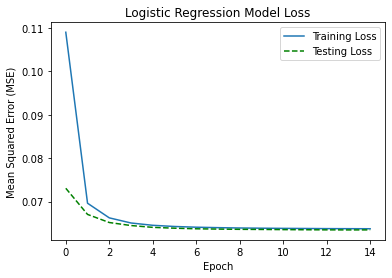

In [21]:
%matplotlib inline
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(6,4))
# # summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'], 'g--')
plt.title('Logistic Regression Model Loss')
plt.ylabel('Mean Squared Error (MSE)')
plt.xlabel('Epoch')
plt.legend(['Training Loss', 'Testing Loss'], loc='upper right')
print("Loss after final iteration: ", history.history['val_loss'][-1])
plt.show()

In [22]:
predictions = (pd.DataFrame(model.predict(X_test.to_numpy())))

M11= predictions.to_numpy()

predictions[M11 > (0.5)] = 'normal'
predictions[M11 <= (0.5)] = 'anamoly'

My11=y_test.to_numpy().reshape(-1,1).copy()

y_test_labels = y_test.to_numpy().reshape(-1,1).copy()
y_test_labels[My11 > 0.5] = 'normal'
y_test_labels[My11 <= 0.5] = 'anamoly'

print('accuracy', accuracy_score(predictions,y_test_labels))
print('confusion matrix\n', confusion_matrix(predictions,y_test_labels))

print(classification_report(predictions,y_test_labels))

accuracy 0.9784463040107526
confusion matrix
 [[ 43867    569]
 [  4755 197820]]
              precision    recall  f1-score   support

     anamoly       0.90      0.99      0.94     44436
      normal       1.00      0.98      0.99    202575

    accuracy                           0.98    247011
   macro avg       0.95      0.98      0.96    247011
weighted avg       0.98      0.98      0.98    247011



### MLP Model on the KDD Cup 1999 dataset

In [23]:
from keras.models import Sequential
from keras.layers import Dense
from keras.regularizers import l2, l1
from keras.optimizers import SGD

# Stochastic Logistic Regression
model = Sequential()

# Model
model.add(Dense(units=4, input_shape=[X_train.shape[1]], 
                activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dense(units=2, 
                activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dense(units=1,
                activation='sigmoid', kernel_regularizer=l2(0.001)))
# Compile model
sgd = SGD(learning_rate=0.1)
model.compile(loss='binary_crossentropy', optimizer=sgd)

In [25]:
# Fit the model
history = model.fit(X_train.to_numpy().astype(np.bool_), y_train.to_numpy().astype(np.bool_).reshape(-1,1),batch_size = 256, epochs = 15, verbose=2,validation_data=(X_test.to_numpy().astype(np.bool_), y_test.to_numpy().astype(np.bool_).reshape(-1,1)))


Epoch 1/15
965/965 - 1s - loss: 0.0936 - val_loss: 0.0537
Epoch 2/15
965/965 - 1s - loss: 0.0468 - val_loss: 0.0413
Epoch 3/15
965/965 - 1s - loss: 0.0389 - val_loss: 0.0369
Epoch 4/15
965/965 - 1s - loss: 0.0358 - val_loss: 0.0347
Epoch 5/15
965/965 - 1s - loss: 0.0341 - val_loss: 0.0334
Epoch 6/15
965/965 - 1s - loss: 0.0331 - val_loss: 0.0326
Epoch 7/15
965/965 - 1s - loss: 0.0323 - val_loss: 0.0320
Epoch 8/15
965/965 - 1s - loss: 0.0318 - val_loss: 0.0316
Epoch 9/15
965/965 - 2s - loss: 0.0314 - val_loss: 0.0314
Epoch 10/15
965/965 - 1s - loss: 0.0312 - val_loss: 0.0313
Epoch 11/15
965/965 - 1s - loss: 0.0309 - val_loss: 0.0309
Epoch 12/15
965/965 - 1s - loss: 0.0308 - val_loss: 0.0308
Epoch 13/15
965/965 - 1s - loss: 0.0306 - val_loss: 0.0306
Epoch 14/15
965/965 - 1s - loss: 0.0305 - val_loss: 0.0304
Epoch 15/15
965/965 - 1s - loss: 0.0305 - val_loss: 0.0304


Loss after final iteration:  0.03040376678109169


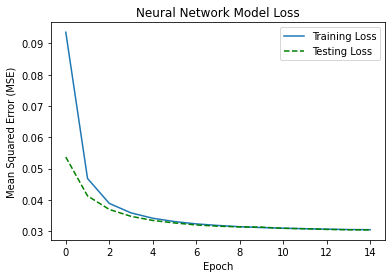

In [26]:
%matplotlib inline
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(6,4))
# # summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'], 'g--')
plt.title('Neural Network Model Loss')
plt.ylabel('Mean Squared Error (MSE)')
plt.xlabel('Epoch')
plt.legend(['Training Loss', 'Testing Loss'], loc='upper right')
print("Loss after final iteration: ", history.history['val_loss'][-1])
plt.show()

In [27]:
predictions = pd.DataFrame(model.predict(X_test.to_numpy()))

#print(predictions)

#print(type(predictions))
M1= predictions.to_numpy()



predictions[M1 > 0.5] = 'normal'
predictions[M1 <= 0.5] = 'anamoly'

#print(predictions)

My12=y_test.to_numpy().reshape(-1,1).copy()

#y_test_labels = y_test.to_numpy().reshape(-1,1).copy()
y_test_labels[My12 > 0.5] = 'normal'
y_test_labels[My12 <= 0.5] = 'anamoly'


print()
print('accuracy', accuracy_score(predictions,y_test_labels))
print('confusion matrix\n', confusion_matrix(predictions,y_test_labels))

print(classification_report(predictions,y_test_labels))


accuracy 0.963892296294497
confusion matrix
 [[ 39886    183]
 [  8736 198206]]
              precision    recall  f1-score   support

     anamoly       0.82      1.00      0.90     40069
      normal       1.00      0.96      0.98    206942

    accuracy                           0.96    247011
   macro avg       0.91      0.98      0.94    247011
weighted avg       0.97      0.96      0.97    247011

